### Assignment 1: Data storytelling

#### Name: Aviv Yefet
ID: 208495267

#### Import

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bidi import algorithm as bidialg

In [4]:
CSV_FILE_PATH = "C:\\Users\\nbloc\\Desktop\\4Year\\ML\\HW1\\FirstNames.xlsx"
NUM_OF_ROWS_TO_SKIP = 12
NUM_OF_SHEETS = 10 
NUM_OF_SHEET_3_RELIGIONS = 6 #The three common religions: Jewish, Moslem and Christian

COLUMN_NAME = "name"
COLUMN_TOTAL_COUNT = "total_count"
COLUMN_NAME_LENGTH = "name_len"

MIN_YEAR = 1948
MAX_YEAR = 2021

YEARS_COLUMNS = [str(year) for year in range(MIN_YEAR, MAX_YEAR + 1)]


### Load dataset

In [5]:
# The data is about the first names of individuals born in Israel between 1948 to 2021 
# The file includes ten sheets,each sheet represent the first name data for religion (Jewish/Moslem/Christian/Druze/Other) and gender (Boys/Girls)

def read_data(sheet_id=0):
    # The function gives the data frame of the requested sheets
    
    df = pd.read_excel(CSV_FILE_PATH, sheet_name=sheet_id, skiprows=range(0, NUM_OF_ROWS_TO_SKIP))
    df.rename(columns={df.columns[0]: COLUMN_NAME, df.columns[1]: COLUMN_TOTAL_COUNT}, inplace=True)
    return df

read_data() # sheet number one:  Jewish Boys first name data

,name,total_count,1948,1949,1950,1951,1952,1953,1954,1955,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,אבא,179,.,6,..,..,8,..,5,..,...,..,..,..,..,..,..,..,..,..,..
1,אבי,9047,34,49,53,79,92,80,89,97,...,9,10,10,11,9,10,..,..,13,10
2,אבי-אברהם,29,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,אביאור,523,.,.,.,.,.,.,.,.,...,11,14,18,19,31,25,22,27,27,32
4,אביאל,5734,..,..,..,..,..,..,..,6,...,161,163,260,314,297,274,231,222,178,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,תימור,129,.,.,.,.,.,.,.,.,...,5,..,..,..,..,..,5,..,..,..
1038,תלם,67,.,.,.,.,.,.,.,.,...,..,..,..,.,..,..,7,..,8,6
1039,תם,590,.,.,.,.,.,.,.,.,...,..,5,..,6,..,..,5,6,6,7
1040,תמיר,6247,.,..,.,5,..,9,6,12,...,65,43,57,51,40,32,27,15,18,30


### Functions for data visualization

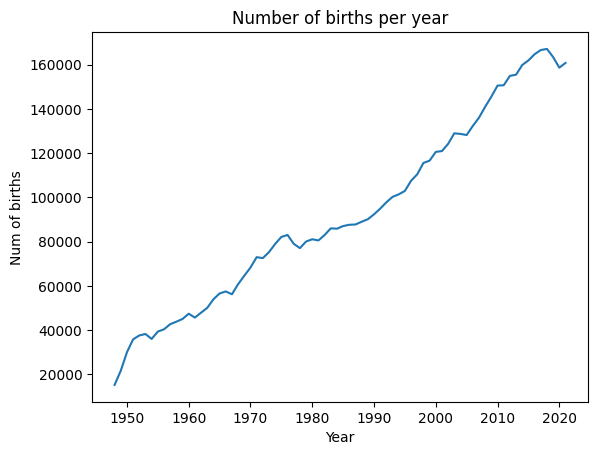

In [9]:
def total_births_in_each_year():
    # total births of three common religions between 1948 to 2021
    
    # init sums series to zeros(Series of years range initialized with zeros)
    years_series = pd.Series([0 for _ in range(int(YEARS_COLUMNS[0]), int(YEARS_COLUMNS[-1]) + 1)],
                             index=list(map(int, YEARS_COLUMNS)))

    for sheet_id in range(NUM_OF_SHEET_3_RELIGIONS):
        df = read_data(sheet_id)

        df.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1,
                inplace=True)  # drop names and total counts as it's irrelevant
        df.replace('..', 0, inplace=True)
        df.replace('.', 0, inplace=True)

        sums_per_year = df.sum()

        years_series += sums_per_year

    years = np.array(years_series.axes).reshape(-1)  # Years np array flattened
    sums = np.array(years_series.values).reshape(-1)  # Sums values np array flattened

    plt.plot(years, sums)
    plt.title("Number of births per year")
    plt.xlabel("Year")
    plt.ylabel("Num of births")
    plt.show()

total_births_in_each_year()

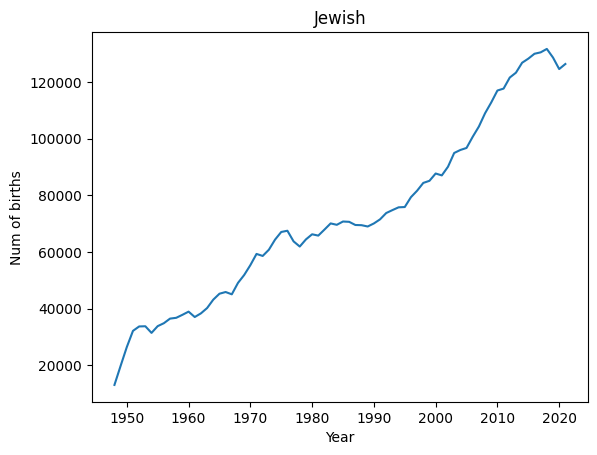

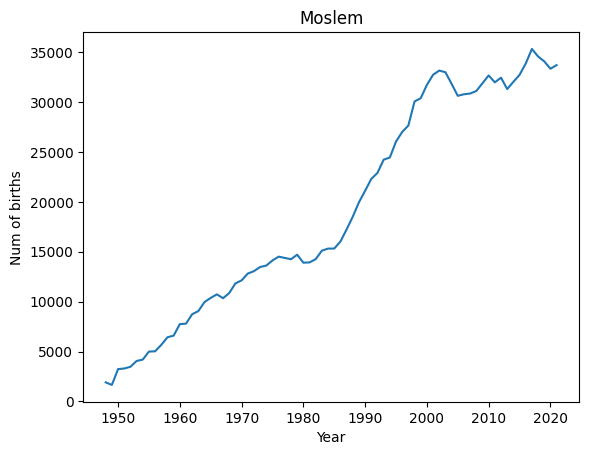

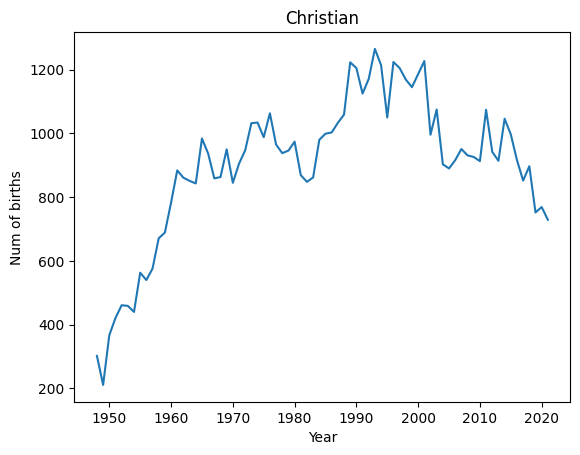

In [75]:
def births_in_years_per_religion():
    # plotting the total numbers of births for each three common religions
    
    lables = ['Jewish','Moslem','Christian'] 
    i_lable = 0
    
    for sheet_id in range(0, NUM_OF_SHEET_3_RELIGIONS, 2):# For the 3 religions
        
        df_boys = read_data(sheet_id)   
        df_girls = read_data(sheet_id + 1)
        
         # Data cleaning - boys data
        df_boys.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1,inplace=True)  # drop names and total counts as it's irrelevant
        df_boys.replace('..', 0, inplace=True)
        df_boys.replace('.', 0, inplace=True)
        
        # Data cleaning - girls data
        df_girls.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1,inplace=True)  # drop names and total counts as it's irrelevant
        df_girls.replace('..', 0, inplace=True)
        df_girls.replace('.', 0, inplace=True)

        boys_sums_per_year = df_boys.sum()
        boys_years = np.array(boys_sums_per_year.axes).reshape(-1)
        boys_sums = np.array(boys_sums_per_year.values) # birth number of boys

        girls_sums_per_year = df_girls.sum()
        girls_years = np.array(girls_sums_per_year.axes).reshape(-1)
        girls_sums = np.array(girls_sums_per_year.values) # birth number of girls

        # Summary
        years = boys_years  # doesn't matter
        sums = boys_sums + girls_sums # total birth number (boys and girls)
        
        # Creating plot for each religion
        plt.plot(years, sums)
        plt.title(lables[i_lable])
        plt.xlabel("Year")
        plt.ylabel("Num of births")

        plt.show()
        
        i_lable = i_lable + 1
        
births_in_years_per_religion()

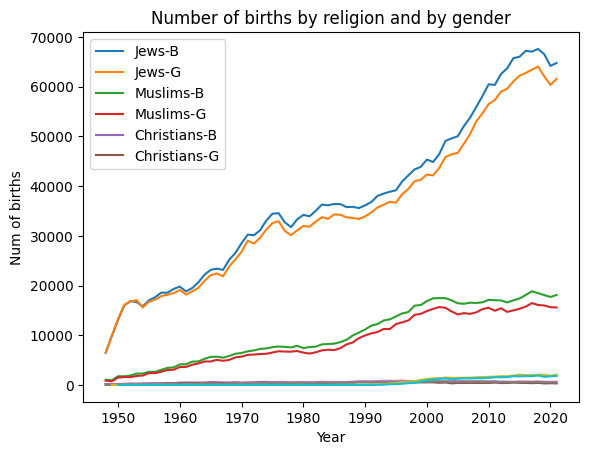

In [69]:
def births_in_years_by_gender_by_religion():
    # plotting the numbers of births by gender and by religion in 1948-2021
  
    for sheet_id in range(NUM_OF_SHEETS):
        df = read_data(sheet_id) 
        df.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1,inplace=True)  # drop names and total counts as it's irrelevant
        
        # Data cleaning
        df.replace('..', 0, inplace=True) # considered 1-4 cases to be negligible cases
        df.replace('.', 0, inplace=True) # "." means zero cases 

        sums_per_year = df.sum() # calculate the number of births per year
        years = np.array(sums_per_year.axes).reshape(-1)
        sums = np.array(sums_per_year.values)

        plt.plot(years, sums)
        plt.title("Number of births by religion and by gender")
        plt.xlabel("Year")
        plt.ylabel("Num of births")
        plt.legend(['Jews-B','Jews-G','Muslims-B','Muslims-G','Christians-B','Christians-G'])
    
    plt.show()

births_in_years_by_gender_by_religion()

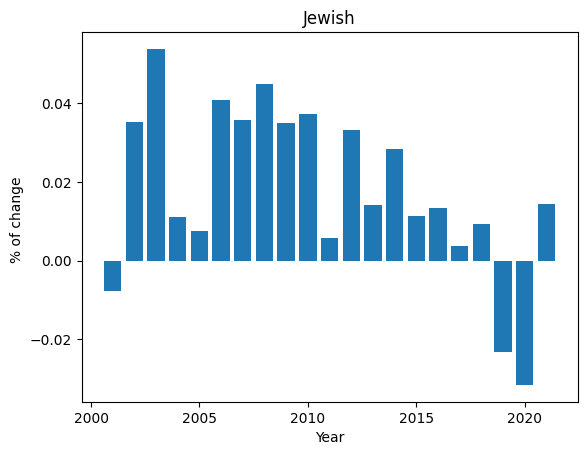

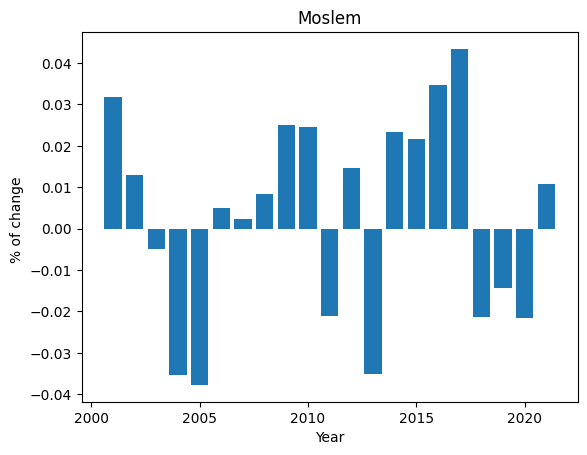

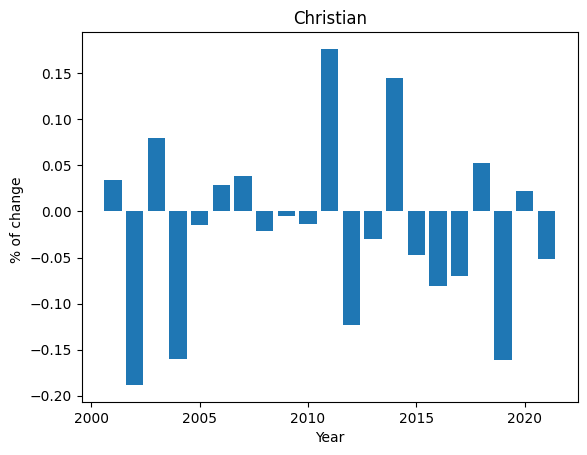

In [93]:
def percentage_of_change_in_births():
    # percentage of change in number of births from previous year in the 2000s
    
    lables = ['Jewish','Moslem','Christian']
    i_lable = 0;
    
    for sheet_id in range(0, NUM_OF_SHEET_3_RELIGIONS, 2):  # For the 3 religions
        df_boys = read_data(sheet_id)
        df_girls = read_data(sheet_id + 1)

        df_boys.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1, inplace=True)  # drop names and total counts as it's irrelevant
        df_boys.replace('..', 0, inplace=True)
        df_boys.replace('.', 0, inplace=True)
        df_boys = df_boys.loc[:,2000:] # from 2000 to 2021
        

        df_girls.drop([COLUMN_NAME, COLUMN_TOTAL_COUNT], axis=1,inplace=True)  # drop names and total counts as it's irrelevant
        df_girls.replace('..', 0, inplace=True)
        df_girls.replace('.', 0, inplace=True)
        df_girls = df_girls.loc[:,2000:] # from 2000 to 2021
        
        # Data cleaning - boys data
        boys_sums_per_year = df_boys.sum()
        boys_years = np.array(boys_sums_per_year.axes).reshape(-1)
        boys_sums = np.array(boys_sums_per_year.values)
        
        # Data cleaning - girls data
        girls_sums_per_year = df_girls.sum()
        girls_years = np.array(girls_sums_per_year.axes).reshape(-1)
        girls_sums = np.array(girls_sums_per_year.values)

        # Summary
        years = boys_years  # doesn't matter
        sums = boys_sums + girls_sums # total birth number (boys and girls)

        pct_of_change_in_briths = pd.Series(sums).pct_change()
        
        #Creating plot for each religion
        plt.bar(years, pct_of_change_in_briths)
        plt.title(lables[i_lable])
        
        plt.xlabel("Year")
        plt.ylabel("% of change ")

        
        plt.show()
        i_lable = i_lable + 1
        
percentage_of_change_in_births()

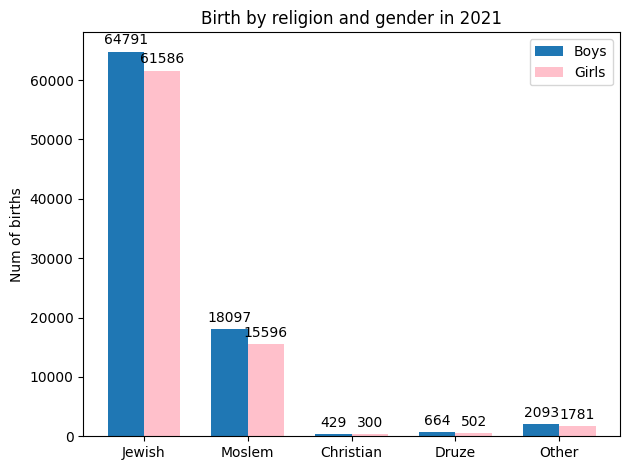

In [70]:
def births_in_last_year_by_gender_by_religion():
    # plotting the number of births by gender and by religion in 2021

    Boys_briths = list()
    Girls_briths = list()
    labels = ['Jewish', 'Moslem', 'Christian', 'Druze', 'Other']
    
    for sheet_id in range(NUM_OF_SHEETS):
        df = read_data(sheet_id)
        df.replace('..', 0, inplace=True)
        df.replace('.', 0, inplace=True)
        
        if sheet_id % 2==0:        #Boys
             Boys_briths.append(df[int('2021')].sum())
        else:                     #Girls
            Girls_briths.append(df[int('2021')].sum())
    
    
    # creating the bar plot
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Boys_briths, width, label='Boys')
    rects2 = ax.bar(x + width/2, Girls_briths, width, label='Girls',color="pink")

    ax.set_ylabel('Num of births')
    ax.set_title('Birth by religion and gender in 2021')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()
        
births_in_last_year_by_gender_by_religion()






In [79]:
def how_many_boys_and_girls_ever():
    # Calculate the mumber of boys and girls in 1948-2021
    total_boys = 0
    total_girls = 0
    for sheet_id in range(NUM_OF_SHEETS):
        df = read_data(sheet_id)
        if sheet_id % 2 == 0:  # Boys
            boys_per_community = df[COLUMN_TOTAL_COUNT].sum()
            total_boys = total_boys + boys_per_community
        else:                  # Girls
            girls_per_community = df[COLUMN_TOTAL_COUNT].sum()
            total_girls = total_girls + girls_per_community

    print("Boys: {} \t  Girls: {}".format(total_boys, total_girls))
    
how_many_boys_and_girls_ever()

Boys: 3825806 	  Girls: 3622360


The number of names that are for both girls and boys in the jewish religion is: 361

The top 5 names are:



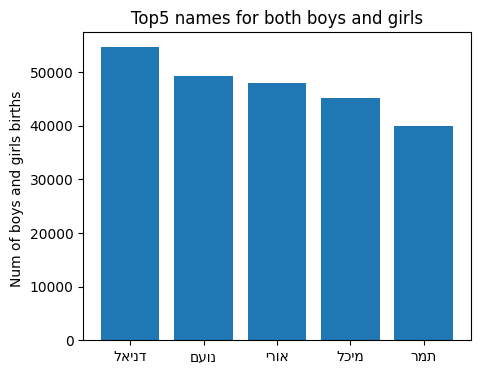

In [103]:
def jewish_names_both_boys_and_girls():
    # Calculates the num of names that are for both boys and girls in jewish religion
    
    df_boys = read_data(0) #Jewish Boys 
    df_girls = read_data(1) #Jewish Girls 

    df_boys_names = df_boys[[COLUMN_NAME,COLUMN_TOTAL_COUNT]]
    df_girls_names = df_girls[[COLUMN_NAME,COLUMN_TOTAL_COUNT]]
    

    s1 = pd.merge(df_boys_names, df_girls_names, how='inner', on=[COLUMN_NAME]) # inner join between the two dataframe
                                                                                # returns only names are given to both boys and girls
    s1['total count'] = s1[['total_count_x','total_count_y']].sum(axis=1) # the total coutn of boys and girls for each name
    s1.sort_values(by='total count',ascending=False,inplace=True) 
    s1['fix_name'] = s1.name.apply(lambda x:x[::-1])
    
    
    print("The number of names that are for both girls and boys in the jewish religion is: " + str(s1.shape[0])+"\n")
    print("The top 5 names are:\n")
    
    names = s1['fix_name'].head()
    total_count = s1['total count'].head()

    fig = plt.figure(figsize =(5, 4))

    plt.bar(names, total_count)
    plt.title('Top5 names for both boys and girls')
    plt.ylabel("Num of boys and girls births ")
    
    
    
    # Show Plot
    plt.show()

    
jewish_names_both_boys_and_girls()


name_length_pie_chart:

name_len
2      131564
3      583560
4     1269589
5      737987
6      129472
7        7836
8         241
9         230
10         66
Name: total_count, dtype: int64
[ 131564  583560 1269589  737987  129472    7836     241     230      66]


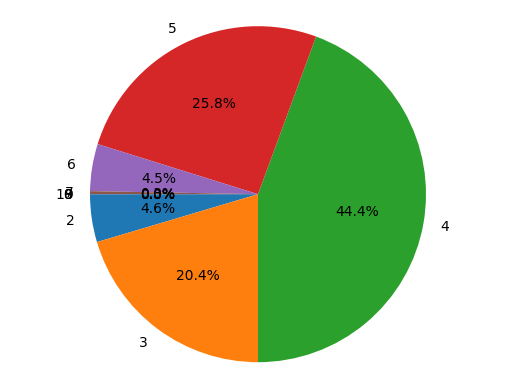

In [109]:
def boys_name_length_pie_chart():
    # Calculates the number of JEWISH BOYS for each name length
    # Prints output to terminal and outputs a PIE char
    print("\nname_length_pie_chart:\n")
    df = read_data()

    df[COLUMN_NAME_LENGTH] = df[COLUMN_NAME].apply(len)

    total_births_per_name_length = df.groupby(by=[COLUMN_NAME_LENGTH])[COLUMN_TOTAL_COUNT].sum()

    print(total_births_per_name_length)
    
    labels = np.array(total_births_per_name_length.axes).reshape(-1)
    sizes = np.array(total_births_per_name_length.values).reshape(-1)
    print(sizes)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    
boys_name_length_pie_chart()




name_length_pie_chart:

name_len
2       67591
3      738176
4     1230829
5      553814
6      138772
7        6196
8        2385
10        627
Name: total_count, dtype: int64
[  67591  738176 1230829  553814  138772    6196    2385     627]


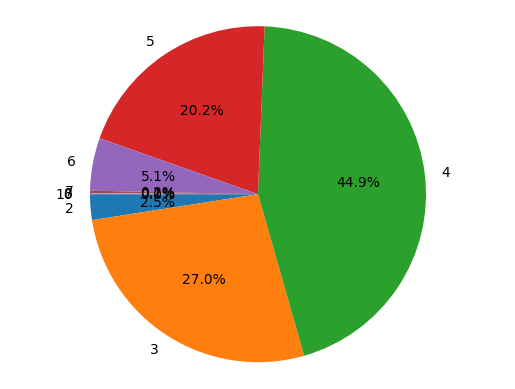

In [108]:
def girls_name_length_pie_chart():
    # Calculates the number of JEWISH girls for each name length
    # Prints output to terminal and outputs a PIE char
    print("\nname_length_pie_chart:\n")
    df = read_data(1)

    df[COLUMN_NAME_LENGTH] = df[COLUMN_NAME].apply(len)

    total_births_per_name_length = df.groupby(by=[COLUMN_NAME_LENGTH])[COLUMN_TOTAL_COUNT].sum()

    print(total_births_per_name_length)
    
    labels = np.array(total_births_per_name_length.axes).reshape(-1)
    sizes = np.array(total_births_per_name_length.values).reshape(-1)
    print(sizes)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

    
girls_name_length_pie_chart()


The top 5 names are:



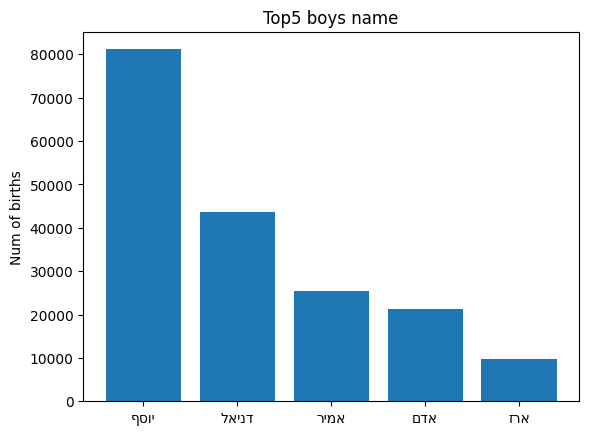

In [104]:
# Boys names common to all 3 religions - the code is doing a triple JOIN of names of boys sheets
def boys_names_common_in_all_3_religions():
    df_jewish_boys = read_data(0)
    df_muslim_boys = read_data(2)
    df_christian_boys = read_data(4)
    
    tmp_jewish_muslim_merged = pd.merge(df_jewish_boys, df_muslim_boys, how='inner', on=[COLUMN_NAME])

    merged_df = pd.merge(tmp_jewish_muslim_merged, df_christian_boys, how='inner', on=[COLUMN_NAME])
    
    merged_df['total_count'] = merged_df['total_count_x'] + merged_df['total_count_y'] 
    
    merged_df.sort_values(by='total_count', ascending=False,inplace=True) # Sort the df 
    
    merged_df['fix_name'] = merged_df.name.apply(lambda x:x[::-1])
 
    print("The top 5 names are:\n")
    
    names = merged_df['fix_name'].head()
    total_count = merged_df['total_count'].head()

    plt.bar(names, total_count)
    plt.title('Top5 boys name')
    plt.ylabel("Num of births")
    
    # Show Plot
    plt.show()  
    
boys_names_common_in_all_3_religions()

The top 5 names are:



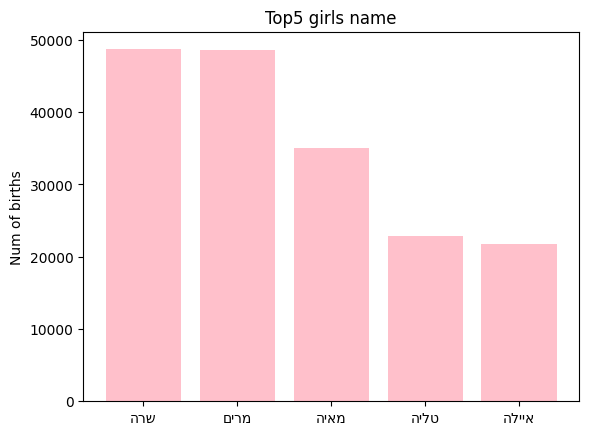

In [105]:
# Girls names common to all 3 religions - the code is doing a triple JOIN of names of girls sheets
def girls_names_common_in_all_3_religions():
    df_jewish_girls = read_data(1)
    df_muslim_girls = read_data(3)
    df_christian_girls = read_data(5)

    tmp_jewish_muslim_merged = pd.merge(df_jewish_girls, df_muslim_girls, how='inner', on=[COLUMN_NAME])

    merged_df = pd.merge(tmp_jewish_muslim_merged, df_christian_girls, how='inner', on=[COLUMN_NAME])

    merged_df['total_count'] = merged_df['total_count_x'] + merged_df['total_count_y'] 
    
    merged_df.sort_values(by='total_count', ascending=False,inplace=True) # Sort the df
    
    merged_df['fix_name'] = merged_df.name.apply(lambda x:x[::-1])
    
    print("The top 5 names are:\n")
    
    names = merged_df['fix_name'].head()
    total_count = merged_df['total_count'].head()

    plt.bar(names, total_count, color='pink')
    plt.title('Top5 girls name')
    plt.ylabel("Num of births")
    
    # Show Plot
    plt.show()  
    
    
girls_names_common_in_all_3_religions()


most_popular_name_ever:

sheet: 0 	 - name: דוד 	 total_count: 66415
sheet: 1 	 - name: נועה 	 total_count: 47398
sheet: 2 	 - name: מוחמד 	 total_count: 115356
sheet: 3 	 - name: פאטמה 	 total_count: 15073
sheet: 4 	 - name: אליאס 	 total_count: 2553
sheet: 5 	 - name: מריה 	 total_count: 1048
sheet: 6 	 - name: סולימאן 	 total_count: 1815
sheet: 7 	 - name: נור 	 total_count: 642
sheet: 8 	 - name: דניאל 	 total_count: 4890
sheet: 9 	 - name: ניקול 	 total_count: 1843


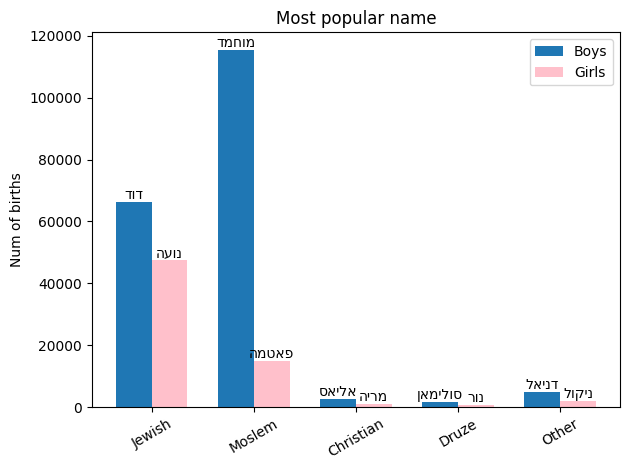

In [107]:
def most_popular_name_ever():
    print("\nmost_popular_name_ever:\n")
    
    labels = ['Jewish', 'Moslem', 'Christian', 'Druze', 'Other']
    Boys_name = list()
    Girls_name = list()
    B_most_popular_name_list = list()
    G_most_popular_name_list = list()
    n = list()
    
    
    for sheet_id in range(NUM_OF_SHEETS):
        df = read_data(sheet_id)
        
        if sheet_id % 2==0:        #Boys
            most_popular_row = df[COLUMN_TOTAL_COUNT].idxmax()  # get max row index depending on total_count of name along years
            B_most_popular_name = df.iloc[most_popular_row][COLUMN_NAME] 
            B_most_popular_count = df.iloc[most_popular_row][COLUMN_TOTAL_COUNT]
            Boys_name.append(B_most_popular_count)
            n.append(B_most_popular_name)
            B_most_popular_name_list.append(B_most_popular_name)
            print("sheet: {} \t - name: {} \t total_count: {}".format(sheet_id, B_most_popular_name, B_most_popular_count))
            
            
        else:                     #Girls
            
            most_popular_row = df[COLUMN_TOTAL_COUNT].idxmax()  # get max row index depending on total_count of name along years
            G_most_popular_name = df.iloc[most_popular_row][COLUMN_NAME] 
            G_most_popular_count = df.iloc[most_popular_row][COLUMN_TOTAL_COUNT]
            Girls_name.append(G_most_popular_count)
            n.append(G_most_popular_name)
            G_most_popular_name_list.append(G_most_popular_name)
            
            print("sheet: {} \t - name: {} \t total_count: {}".format(sheet_id, G_most_popular_name, G_most_popular_count))

    x = np.arange(len(labels))    
    opacity = 0.4
    width = 0.35  # the width of the bars

    plt.ylabel('Num of births')
    plt.title('Most popular name')

    plt.xticks(x, labels, rotation=30)
    bar1 = plt.bar(x - width/2,Boys_name , width, label='Boys')
    bar2 = plt.bar(x + width/2, Girls_name, width, label='Girls',color="pink")

    
    # Add counts above the two bar graphs
    for i,rect in enumerate(bar1):
        height = rect.get_height()
        text = bidialg.get_display(B_most_popular_name_list[i]) # for rigth to left 
        plt.text(rect.get_x() + rect.get_width() / 2.0, height,text, ha='center', va='bottom',)
    for i,rect in enumerate(bar2):
        height = rect.get_height()
        text = bidialg.get_display(G_most_popular_name_list[i]) # for rigth to left 
        plt.text(rect.get_x() + rect.get_width() / 2.0, height,text, ha='center', va='bottom')



    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
    
    # creating the bar plot
    
most_popular_name_ever()


most_popular_name_ever:

sheet: 0 	 - name: יניב-משה 	 total_count: 8
sheet: 1 	 - name: עשורה 	 total_count: 5
sheet: 2 	 - name: גאית' 	 total_count: 7
sheet: 3 	 - name: רמיה 	 total_count: 7
sheet: 4 	 - name: מילאן 	 total_count: 11
sheet: 5 	 - name: ניהאל 	 total_count: 9
sheet: 6 	 - name: ג'בל 	 total_count: 10
sheet: 7 	 - name: פלק 	 total_count: 7
sheet: 8 	 - name: עז 	 total_count: 11
sheet: 9 	 - name: שייה 	 total_count: 10


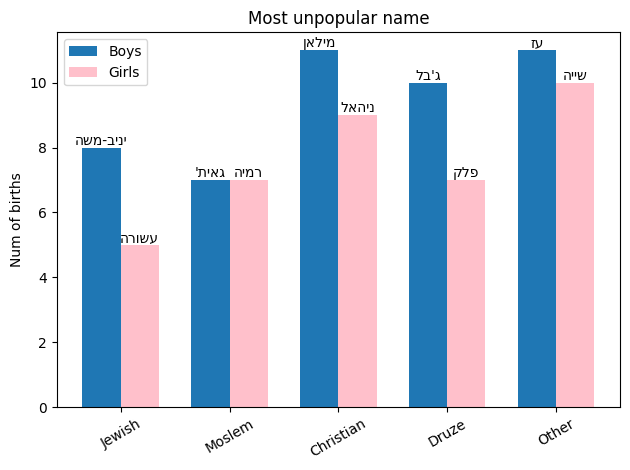

In [106]:
def most_unpopular_name_ever():
    print("\nmost_popular_name_ever:\n")
    
    labels = ['Jewish', 'Moslem', 'Christian', 'Druze', 'Other']
    Boys_name = list()
    Girls_name = list()
    B_most_unpopular_name_list = list()
    G_most_unpopular_name_list = list()
    n = list()
    
    
    for sheet_id in range(NUM_OF_SHEETS):
        df = read_data(sheet_id)
        
        if sheet_id % 2==0:        #Boys
            most_unpopular_row = df[COLUMN_TOTAL_COUNT].idxmin()  # get max row index depending on total_count of name along years
            B_most_unpopular_name = df.iloc[most_unpopular_row][COLUMN_NAME] 
            B_most_unpopular_count = df.iloc[most_unpopular_row][COLUMN_TOTAL_COUNT]
            Boys_name.append(B_most_unpopular_count)
            n.append(B_most_unpopular_name)
            B_most_unpopular_name_list.append(B_most_unpopular_name)
            print("sheet: {} \t - name: {} \t total_count: {}".format(sheet_id, B_most_unpopular_name, B_most_unpopular_count))
            
            
        else:                     #Girls
            
            most_unpopular_row = df[COLUMN_TOTAL_COUNT].idxmin()  # get max row index depending on total_count of name along years
            G_most_unpopular_name = df.iloc[most_unpopular_row][COLUMN_NAME] 
            G_most_unpopular_count = df.iloc[most_unpopular_row][COLUMN_TOTAL_COUNT]
            Girls_name.append(G_most_unpopular_count)
            n.append(G_most_unpopular_name)
            G_most_unpopular_name_list.append(G_most_unpopular_name)
            
            print("sheet: {} \t - name: {} \t total_count: {}".format(sheet_id, G_most_unpopular_name, G_most_unpopular_count))

    x = np.arange(len(labels))    
    opacity = 0.4
    width = 0.35  # the width of the bars

    plt.ylabel('Num of births')
    plt.title('Most unpopular name')

    plt.xticks(x, labels, rotation=30)
    bar1 = plt.bar(x - width/2,Boys_name , width, label='Boys')
    bar2 = plt.bar(x + width/2, Girls_name, width, label='Girls',color="pink")

    
    # Add counts above the two bar graphs
    for i,rect in enumerate(bar1):
        height = rect.get_height()
        text = bidialg.get_display(B_most_unpopular_name_list[i]) # for rigth to left 
        plt.text(rect.get_x() + rect.get_width() / 2.0, height,text, ha='center', va='bottom',)
    for i,rect in enumerate(bar2):
        height = rect.get_height()
        text = bidialg.get_display(G_most_unpopular_name_list[i]) # for rigth to left 
        plt.text(rect.get_x() + rect.get_width() / 2.0, height,text, ha='center', va='bottom')



    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
    
    # creating the bar plot
    
most_unpopular_name_ever()